In [137]:
# Import the libraries and packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pylab
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
import statistics
from scipy import stats

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

# Import the dataset CSV
df = pd.read_csv('medical_clean.csv', index_col=0)

# Check the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [138]:
# Rename columns to give proper naming to predictors
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat',
 'Item3':'Timely_visits','Item4':'Reliability',
 'Item5':'Options','Item6':'Hrs_treat',
 'Item7':'Courteous','Item8':'Active_listen'},inplace=True)
df.head()
df.info()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [139]:
# Checking that the variables got renamed correctly
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [140]:
# Dropping irrelevant variables for KNN such as demographic data, variables with more than 3 levels of cardinality
df.drop(['Customer_id','Interaction', 'UID', 'City', 'State',
        'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 
        'Children','ReAdmis', 'Full_meals_eaten','vitD_supp', 'Soft_drink',
        'Additional_charges', 'Timely_admis', 'Timely_treat', 'Timely_visits', 'Reliability', 'Options',
        'Hrs_treat', 'Courteous', 'Active_listen'], axis=1, inplace=True) 

In [141]:
# Reviewing the new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxiety  

In [142]:
df.shape

(10000, 23)

In [143]:
# Checking for null values
df.isna().any()
df.isnull().sum()

Area                  False
Age                   False
Income                False
Marital               False
Gender                False
VitD_levels           False
Doc_visits            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
Services              False
Initial_days          False
TotalCharge           False
dtype: bool

Area                  0
Age                   0
Income                0
Marital               0
Gender                0
VitD_levels           0
Doc_visits            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
dtype: int64

In [144]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [145]:
# finding the count of unique values in each column - to determine levels of cardinality
df.nunique()

Area                     3
Age                     72
Income                9993
Marital                  5
Gender                   3
VitD_levels           9976
Doc_visits               9
Initial_admin            3
HighBlood                2
Stroke                   2
Complication_risk        3
Overweight               2
Arthritis                2
Diabetes                 2
Hyperlipidemia           2
BackPain                 2
Anxiety                  2
Allergic_rhinitis        2
Reflux_esophagitis       2
Asthma                   2
Services                 4
Initial_days          9997
TotalCharge           9997
dtype: int64

In [146]:
# Checking data types of the variables - the objects/categorical variables need to be encoded to numerical data
df.dtypes

Area                   object
Age                     int64
Income                float64
Marital                object
Gender                 object
VitD_levels           float64
Doc_visits              int64
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
dtype: object

In [147]:
# Scaling data to make it easier to visualize outliers - done for the continuous variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scaled the min and max of the continuous variables with .fit
scaler.fit(df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge']])

# Create new data frame with the transformed scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge']]),
                         columns=['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge'])


MinMaxScaler()

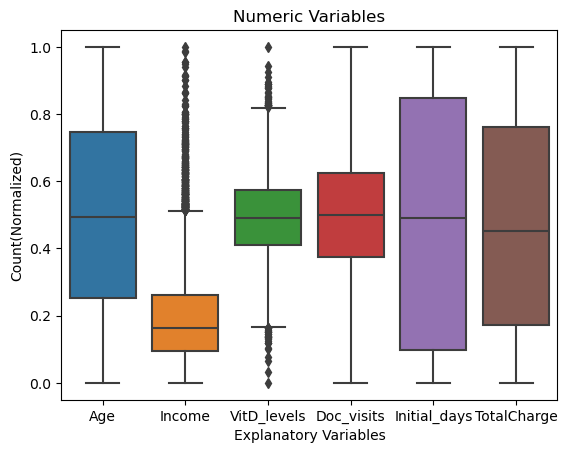

In [148]:
# Visualizing Outliers
sns.boxplot(df_scaled)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Explanatory Variables');

In [149]:
# Removing Outliers using z-scores
import scipy.stats as stats

#Creating New columns for z-scores
df['Income_z_Scores'] = stats.zscore(df['Income'])
df['VitD_level_z_Scores'] = stats.zscore(df['VitD_levels'])

# Removing records with z-scores -3 < z < 3
df = df[(df['Income_z_Scores'] > -3) & (df['Income_z_Scores'] < 3) & (df['VitD_level_z_Scores'] > -3) & (df['VitD_level_z_Scores'] < 3)]
df.drop(['Income_z_Scores', 'VitD_level_z_Scores'], axis=1, inplace=True)

In [150]:
# Removing outliers reduces the total number of values in variables from 10000 to 9833
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9833 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                9833 non-null   object 
 1   Age                 9833 non-null   int64  
 2   Income              9833 non-null   float64
 3   Marital             9833 non-null   object 
 4   Gender              9833 non-null   object 
 5   VitD_levels         9833 non-null   float64
 6   Doc_visits          9833 non-null   int64  
 7   Initial_admin       9833 non-null   object 
 8   HighBlood           9833 non-null   object 
 9   Stroke              9833 non-null   object 
 10  Complication_risk   9833 non-null   object 
 11  Overweight          9833 non-null   object 
 12  Arthritis           9833 non-null   object 
 13  Diabetes            9833 non-null   object 
 14  Hyperlipidemia      9833 non-null   object 
 15  BackPain            9833 non-null   object 
 16  Anxiety   

In [151]:
# Convert categorical variables to numerical format using one-hot encoding where appropriate
binary_columns = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# For binary columns, map 'Yes/No' to 1/0
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [152]:
multi_category_columns = ['Gender', 'Area', 'Initial_admin', 'Marital', 'Services']

# For multi-category columns, use one-hot encoding. Drop_first is false because P dummies is recommended to keep in KNN (Bruce 2020).
df = pd.get_dummies(data=df, columns=multi_category_columns, drop_first=False)

# Convert only the one-hot encoded columns to integers
one_hot_columns = [col for col in df.columns if any (prefix in col for prefix in multi_category_columns)]
for col in one_hot_columns:
    df[col] = df[col].astype(int)

In [153]:
# Using Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
complication_encoded = enc.fit_transform(df[['Complication_risk']])
df['Complication_risk'] = complication_encoded

In [154]:
# Checking data types to see if encoding worked
df.dtypes

Age                                      int64
Income                                 float64
VitD_levels                            float64
Doc_visits                               int64
HighBlood                                int64
Stroke                                   int64
Complication_risk                      float64
Overweight                               int64
Arthritis                                int64
Diabetes                                 int64
Hyperlipidemia                           int64
BackPain                                 int64
Anxiety                                  int64
Allergic_rhinitis                        int64
Reflux_esophagitis                       int64
Asthma                                   int64
Initial_days                           float64
TotalCharge                            float64
Gender_Female                            int64
Gender_Male                              int64
Gender_Nonbinary                         int64
Area_Rural   

In [155]:
# Isolate continuous variables to normalize the data
continuous_columns = ['Age', 'Income', 'VitD_levels', 'Initial_days', 'Doc_visits', 'TotalCharge']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [156]:
# Summary statistics of the data frame after scaling. MinMax does better since it limits min and max to 0 and 1.
df.describe()

,Age,Income,VitD_levels,Doc_visits,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Gender_Female,Gender_Male,Gender_Nonbinary,Area_Rural,Area_Suburban,Area_Urban,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
count,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000
mean,0.500353,0.307968,0.500692,0.501487,0.409234,0.199329,1.114207,0.709244,0.357775,0.274687,0.336215,0.410861,0.321875,0.393979,0.412692,0.289942,0.471523,0.466101,0.501678,0.477169,0.021153,0.336622,0.332655,0.330723,0.249975,0.506661,0.243364,0.195261,0.202685,0.198312,0.198820,0.204922,0.527306,0.122038,0.313028,0.037628
std,0.290684,0.201888,0.166242,0.130545,0.491718,0.399516,0.879933,0.454134,0.479370,0.446379,0.472437,0.492015,0.467219,0.488655,0.492343,0.453758,0.370581,0.301033,0.500023,0.499504,0.143902,0.472578,0.471188,0.470497,0.433020,0.499981,0.429135,0.396422,0.402020,0.398749,0.399133,0.403665,0.499279,0.327346,0.463749,0.190305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253521,0.152639,0.389592,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097357,0.171650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.492958,0.263130,0.499886,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.496192,0.455049,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.746479,0.422081,0.615718,0.625000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.847510,0.762452,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
# Feature Selection to discover the best independent variables to use in the model
y = df['HighBlood']
X = df.drop(columns=['HighBlood'])

feature_names = X.columns

# Initialize the class and call fit_transform
skbest = SelectKBest(f_classif, k='all') # k = features
X_new = skbest.fit_transform(X, y)
X_new.shape

# Finding p-values to select statistically significant features
p_values = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value']<0.05]

# Features to keep defined
features_to_keep = p_values['Feature'][p_values['p_value']<.05] 

# Print the name of the selected features
print(features_to_keep)

(9833, 35)

,Feature,p_value
6,Overweight,0.008800
27,Marital_Married,0.017925


6          Overweight
27    Marital_Married
Name: Feature, dtype: object


In [158]:
selected_features_columns = list(df[features_to_keep])
print(selected_features_columns)

feature_select_medical_data = df[selected_features_columns]

feature_select_medical_data = feature_select_medical_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
feature_select_medical_data.to_csv('./feature-selected-medical-data.csv')

['Overweight', 'Marital_Married']


In [159]:
X_new = sm.add_constant(X[selected_features_columns])
y_new = y

print(X_new.shape)
print(y_new.shape)

# Exporting cleaned dataset
cleaned_dataset = df.to_csv('cleaned_dataset_task_1.csv', index = False)

(9833, 3)
(9833,)


In [160]:
df['HighBlood'].value_counts()

HighBlood
0    5809
1    4024
Name: count, dtype: int64

In [161]:
# Square root of N samples is used to find optimal value of neighbors
np.sqrt(9833)

99.16148445843275

Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into three subsets:

The training set is applied to train or fit your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.

The validation set is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal number of neurons in a neural network or the best kernel for a support vector machine, you experiment with different values. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

The test set is needed for an unbiased evaluation of the final model. You shouldn’t use it for fitting or validation.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets (Stojilikovic 2024).

In [162]:
# Splitting data into train and test sets. 80/20 rule is implemented for test size. Y used as class labels via stratify
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=42, stratify=y)

In [163]:
# Exporting train and test data to CSV. Model is trained on training data and tested on testing data (hold out validation).
X_train.to_csv('./x_train_dataset_task_1.csv')
X_test.to_csv('./x_test_dataset_task_1.csv')

y_train.to_csv('./y_train_dataset_task_1.csv')
y_test.to_csv('./y_test_dataset_task_1.csv')

In [174]:
# Setting up GridSearchCV and KNeighborsClassifier
param_grid = {'n_neighbors': np.arange(1, 101)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

{'n_neighbors': 74}

In [175]:
# Mean cross-validated score of the best estimator, in this case is KNN
knn_cv.best_score_

0.5703129606906897

In [176]:
# Set up the model
knn = KNeighborsClassifier(n_neighbors=74)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=74)

In [177]:
# Create the confusion matrix and the accuracy percentages
# We can also re-fit it to our training set and compute the accuracy. We would expect it to perform better on the training set than the test set
# 74 is chosen for k since this is what the optimal value is after using grid_fit
# KNN model is fit on X and Y training data set.
# Score returns the accuracy of the test set
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix for this KNN model:")
print("No Predicted Blood Pressure | Predicted Blood Pressure")
print(f"{final_matrix[0]} Actual No HighBlood")
print(f"{final_matrix[1]} Actual HighBlood")
print(f"The Training accuracy of the model is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of the model is {knn.score(X_test, y_test)}.")

The confusion matrix for this KNN model:
No Predicted Blood Pressure | Predicted Blood Pressure
[1162    0] Actual No HighBlood
[805   0] Actual HighBlood
The Training accuracy of the model is 0.5907704042715485.
The testing accuracy of the model is 0.5907473309608541.


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve for KNN Classification')

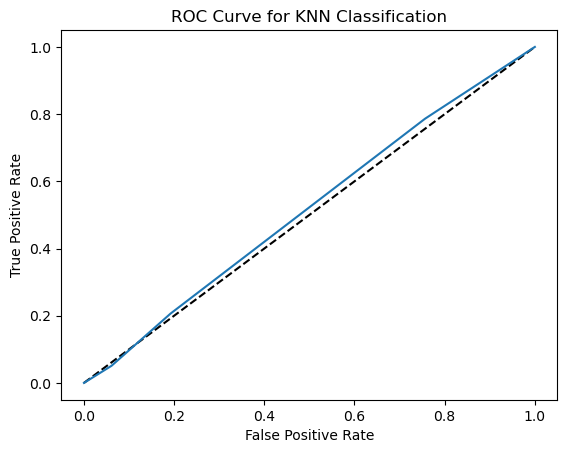

The Area Under the Curve (AUC) score is: 0.5160694241027999

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1162
           1       0.00      0.00      0.00       805

    accuracy                           0.59      1967
   macro avg       0.30      0.50      0.37      1967
weighted avg       0.35      0.59      0.44      1967



In [178]:
# Create and plot the ROC curve and the Area Under the Curve Score
# Accuracy score is correct classifications over total samples.
# Precision score is the perecentage of correct classifications per label. The number of true positives divided by the number of true and false positives.
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

CV is to combine the measures of prediction performance to get more accurate model estimations. One of the widely used cross-validation methods is k-fold cross-validation. In it, you divide your dataset into k (often five or ten) subsets, or folds, of equal size and then perform the training and test procedures k times. Each time, you use a different fold as the test set and all the remaining folds as the training set. This provides k measures of predictive performance, and you can then analyze their mean and standard deviation (Stojilikovic 2024).

Hyperparameter tuning, also called hyperparameter optimization, is the process of determining the best set of hyperparameters to define your machine learning model. sklearn.model_selection provides you with several options for this purpose, including GridSearchCV (Stojilikovic 2024).

The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. AUC is the measure of a classifier's ability to distinguish between classes and is used as a summary of the ROC curve. AUC measures the whole 2-dimensional Area under the ROC as an entire curve from (0,0) to (1,1). (Elleh 2024).